In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [8]:
df_excel = pd.read_excel(r'C:\Users\user\Desktop\end_to_end_ml_project\Data_Sets\data.xlsx')
df_csv = pd.read_csv(r'C:\Users\user\Desktop\end_to_end_ml_project\Data_Sets\data.csv')


copying the dataframe

In [9]:
df_copy=df_csv.copy()

# Data Inspection

In [10]:
df_csv.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [11]:
df_csv.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [12]:
df_excel.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Unnamed: 16,Unnamed: 17
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2.0,0,January542024,NaN
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,3679.0,20.0,2018-11-15T02:19:08Z,2.0,0,February33932024,202455March
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,NaN,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2.0,0,March552026,202554March
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,NaN,2018-11-15T03:32:55Z,2.0,0,April542027,202454March
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2.0,0,May542028,202554March


## both datasets are almost the same with some exeption so  we take one, the csv to be exact since it is the more cleaner one.

In [13]:
df=df_csv

In [14]:
df['CountryCode'].value_counts()

CountryCode
256    95662
Name: count, dtype: int64

In [15]:
df.drop('CountryCode',axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   ProviderId            95662 non-null  object 
 7   ProductId             95662 non-null  object 
 8   ProductCategory       95662 non-null  object 
 9   ChannelId             95662 non-null  object 
 10  Amount                95662 non-null  float64
 11  Value                 95662 non-null  int64  
 12  TransactionStartTime  95662 non-null  object 
 13  PricingStrategy       95662 non-null  int64  
 14  FraudResult           95662 non-null  int64  
dtypes: float64(1), int6

In [17]:
df.describe()

,Amount,Value,PricingStrategy,FraudResult
count,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,6.717846e+03,9.900584e+03,2.255974,0.002018
std,1.233068e+05,1.231221e+05,0.732924,0.044872
min,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,2.800000e+03,5.000000e+03,2.000000,0.000000
max,9.880000e+06,9.880000e+06,4.000000,1.000000


In [18]:
df.duplicated().sum()

np.int64(0)

### Data Cleaning:

--> **missing value handling** : but from what we see the missing dataset is very small that we can use simple handling methods:droping, filling with mean median mode  instead of knnimputer an MICE and other advanced imputation techniques

--> **handling duplicates** : no duplicate!

--> **handling outliers** : We will handle the outliers after changing the dataset into an appropriate one, since we have a lot of object that need to bechanged into wither int or float



# Feature Engineering

**first changing to a more appropriate datatypes**

In [20]:
df.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [21]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


we will remove the TransactionId_ from TransactionId column

In [22]:
df['TransactionId']=df['TransactionId'].str.replace('TransactionId_','')

In [23]:
df['TransactionId'].head(10)

0     76871
1     73770
2     26203
3       380
4     28195
5     23223
6    118063
7    100640
8     51905
9    130161
Name: TransactionId, dtype: object

In [24]:
df['TransactionId'].astype(int).head(10)

0     76871
1     73770
2     26203
3       380
4     28195
5     23223
6    118063
7    100640
8     51905
9    130161
Name: TransactionId, dtype: int64

In [25]:
df['BatchId']=df['BatchId'].str.replace('BatchId_','')
df['BatchId'].astype(int).head(10)

0     36123
1     15642
2     53941
3    102363
4     38780
5     25954
6    118460
7     38561
8     93774
9     82409
Name: BatchId, dtype: int64

let's automate it since we have a couple of alike columns which need a the same type of preprocessing

In [26]:
columns=['AccountId','SubscriptionId','CustomerId','ProviderId','ProductId','ChannelId']

for column in columns:
    df[column] = df[column].str.replace(column+'_','').astype(int)


df[columns].head(10)

,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
0,3957,887,4406,6,10,3
1,4841,3829,4406,4,6,2
2,4229,222,4683,6,1,3
3,648,2185,988,1,21,3
4,4841,3829,988,4,6,2
5,1078,4238,1432,6,3,3
6,2442,1980,2858,5,3,3
7,4841,3829,2858,4,6,2
8,272,4731,598,6,10,3
9,710,920,1053,1,15,3


In [27]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,UGX,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,UGX,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,UGX,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,UGX,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [28]:
df['CurrencyCode'].value_counts()

CurrencyCode
UGX    95662
Name: count, dtype: int64

the "CurrencyCode" column has only one unique value, so it willnot serve and value for a dicriminative/predictive machine learning model.

In [29]:
df.drop('CurrencyCode',axis=1,inplace=True)

In [30]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [31]:
df['ProductCategory'].value_counts()

ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

<Axes: xlabel='ProductCategory'>

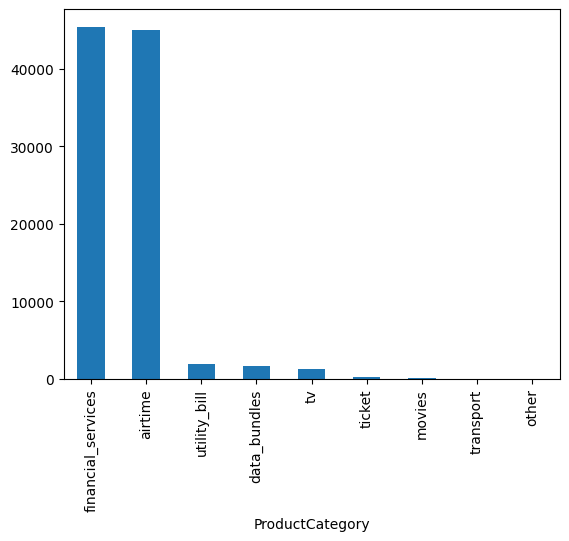

In [32]:
df['ProductCategory'].value_counts().plot(kind='bar')

we use one hot encoding to encode these categorical data

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [34]:
np_encoded_ProductCategory = encoder.fit_transform(df[['ProductCategory']])


df_encoded_ProductCategory = pd.DataFrame(np_encoded_ProductCategory,columns=encoder.get_feature_names_out(['ProductCategory']))

df.drop('ProductCategory',axis=1,inplace=True)

pd.concat([df,df_encoded_ProductCategory],axis=1)



,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,76871,36123,3957,887,4406,6,10,3,1000.0,1000,2018-11-15T02:18:49Z,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73770,15642,4841,3829,4406,4,6,2,-20.0,20,2018-11-15T02:19:08Z,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26203,53941,4229,222,4683,6,1,3,500.0,500,2018-11-15T02:44:21Z,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,380,102363,648,2185,988,1,21,3,20000.0,21800,2018-11-15T03:32:55Z,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28195,38780,4841,3829,988,4,6,2,-644.0,644,2018-11-15T03:34:21Z,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,89881,96668,4841,3829,3078,4,6,2,-1000.0,1000,2019-02-13T09:54:09Z,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95658,91597,3503,3439,2643,3874,6,10,3,1000.0,1000,2019-02-13T09:54:25Z,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95659,82501,118602,4841,3829,3874,4,6,2,-20.0,20,2019-02-13T09:54:35Z,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95660,136354,70924,1346,652,1709,6,19,3,3000.0,3000,2019-02-13T10:01:10Z,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
df.dtypes

TransactionId            object
BatchId                  object
AccountId                 int64
SubscriptionId            int64
CustomerId                int64
ProviderId                int64
ProductId                 int64
ChannelId                 int64
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [36]:
df['BatchId']=df['BatchId'].astype(int)

In [37]:
df.dtypes

TransactionId            object
BatchId                   int64
AccountId                 int64
SubscriptionId            int64
CustomerId                int64
ProviderId                int64
ProductId                 int64
ChannelId                 int64
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [38]:
df['TransactionId'] = df['TransactionId'].astype(int)

In [39]:
df.dtypes

TransactionId             int64
BatchId                   int64
AccountId                 int64
SubscriptionId            int64
CustomerId                int64
ProviderId                int64
ProductId                 int64
ChannelId                 int64
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [40]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,6,10,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,4,6,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,6,1,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,1,21,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,4,6,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [41]:
'''
df['TransactionStartYear']=df['TransactionStartTime'].str.split('-')[0]
df['TransactionStartMonth']=df['TransactionStartTime'].str.split('-')[1].str.split('-')[0]
df['TransactionStartDay']=df['TransactionStartTime'].str.split('-')[1].str.split('-')[1].str.split('T')[0]
df['TransactionStartHour']=df['TransactionStartTime'].str.split('-')[1].str.split('-')[1].str.split('T')[1].str.split(':')[0]
df['TransactionStartMinute']=df['TransactionStartTime'].str.split('-')[1].str.split('-')[1].str.split('T')[1].str.split(':')[1].str.split(':')[0]
df['TransactionStartSecond']=df['TransactionStartTime'].str.split('-')[1].str.split('-')[1].str.split('T')[1].str.split(':')[1].str.split(':')[0].str.split('Z')[0]

'''

"\ndf['TransactionStartYear']=df['TransactionStartTime'].str.split('-')[0]\ndf['TransactionStartMonth']=df['TransactionStartTime'].str.split('-')[1].str.split('-')[0]\ndf['TransactionStartDay']=df['TransactionStartTime'].str.split('-')[1].str.split('-')[1].str.split('T')[0]\ndf['TransactionStartHour']=df['TransactionStartTime'].str.split('-')[1].str.split('-')[1].str.split('T')[1].str.split(':')[0]\ndf['TransactionStartMinute']=df['TransactionStartTime'].str.split('-')[1].str.split('-')[1].str.split('T')[1].str.split(':')[1].str.split(':')[0]\ndf['TransactionStartSecond']=df['TransactionStartTime'].str.split('-')[1].str.split('-')[1].str.split('T')[1].str.split(':')[1].str.split(':')[0].str.split('Z')[0]\n\n"

In [42]:
# First, convert the 'TransactionStartTime' column to datetime format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Now, extract the components
df['TransactionStartYear'] = df['TransactionStartTime'].dt.year
df['TransactionStartMonth'] = df['TransactionStartTime'].dt.month
df['TransactionStartDay'] = df['TransactionStartTime'].dt.day
df['TransactionStartHour'] = df['TransactionStartTime'].dt.hour
df['TransactionStartMinute'] = df['TransactionStartTime'].dt.minute
df['TransactionStartSecond'] = df['TransactionStartTime'].dt.second


In [43]:
df.drop('TransactionStartTime',axis=1,inplace=True)

In [44]:
len(df.columns)

18

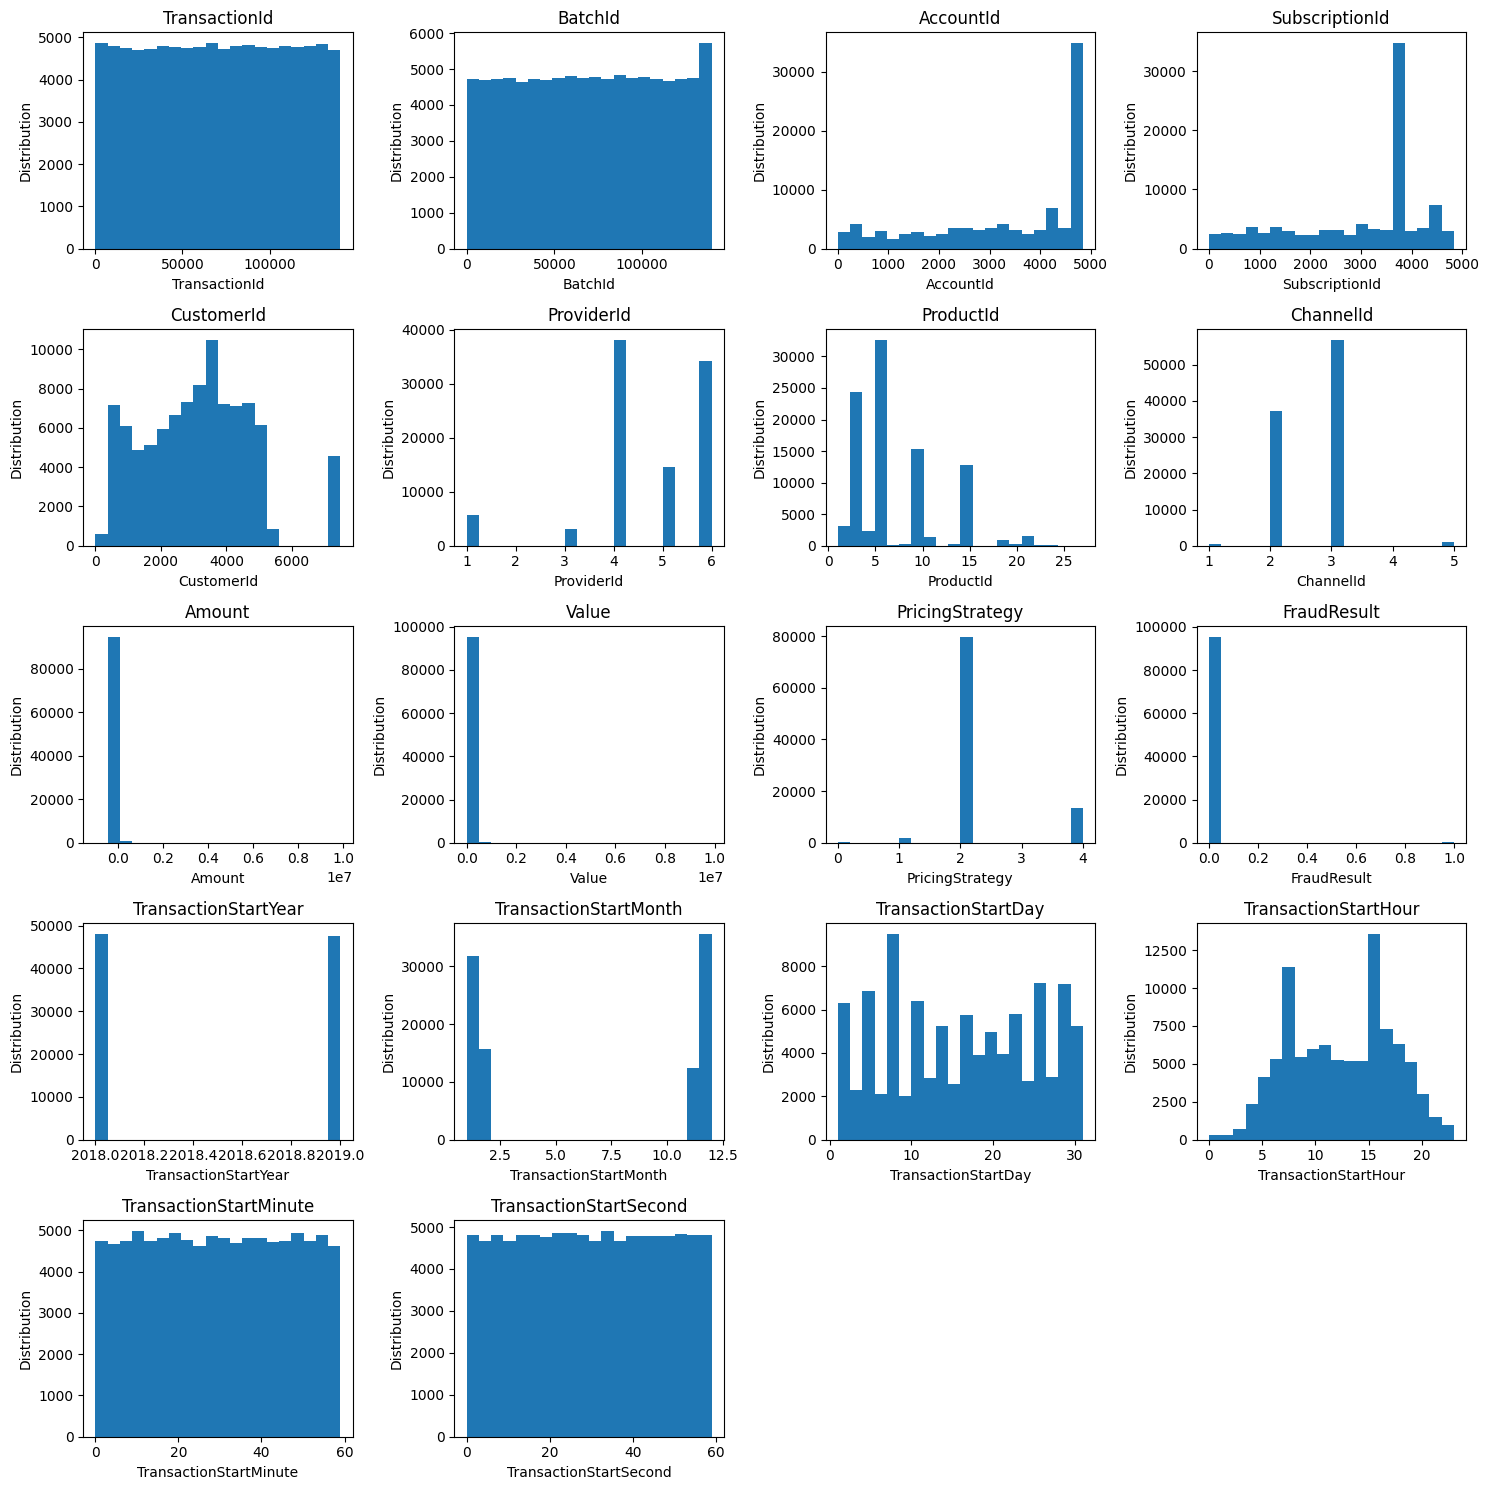

In [45]:

# Define the number of rows and columns for the subplots
n_cols = 4
n_rows = 5  # 5 rows and 4 columns to accommodate 19 plots

# Create subplots for each column
plt.figure(figsize=(15, n_rows * 3))  # Set the figure size to accommodate all plots

for i, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Subplots start at 1, not 0
    df[column].plot(kind='hist',bins=20, title=column)
    plt.xlabel(f'{column}')
    plt.ylabel('Distribution')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

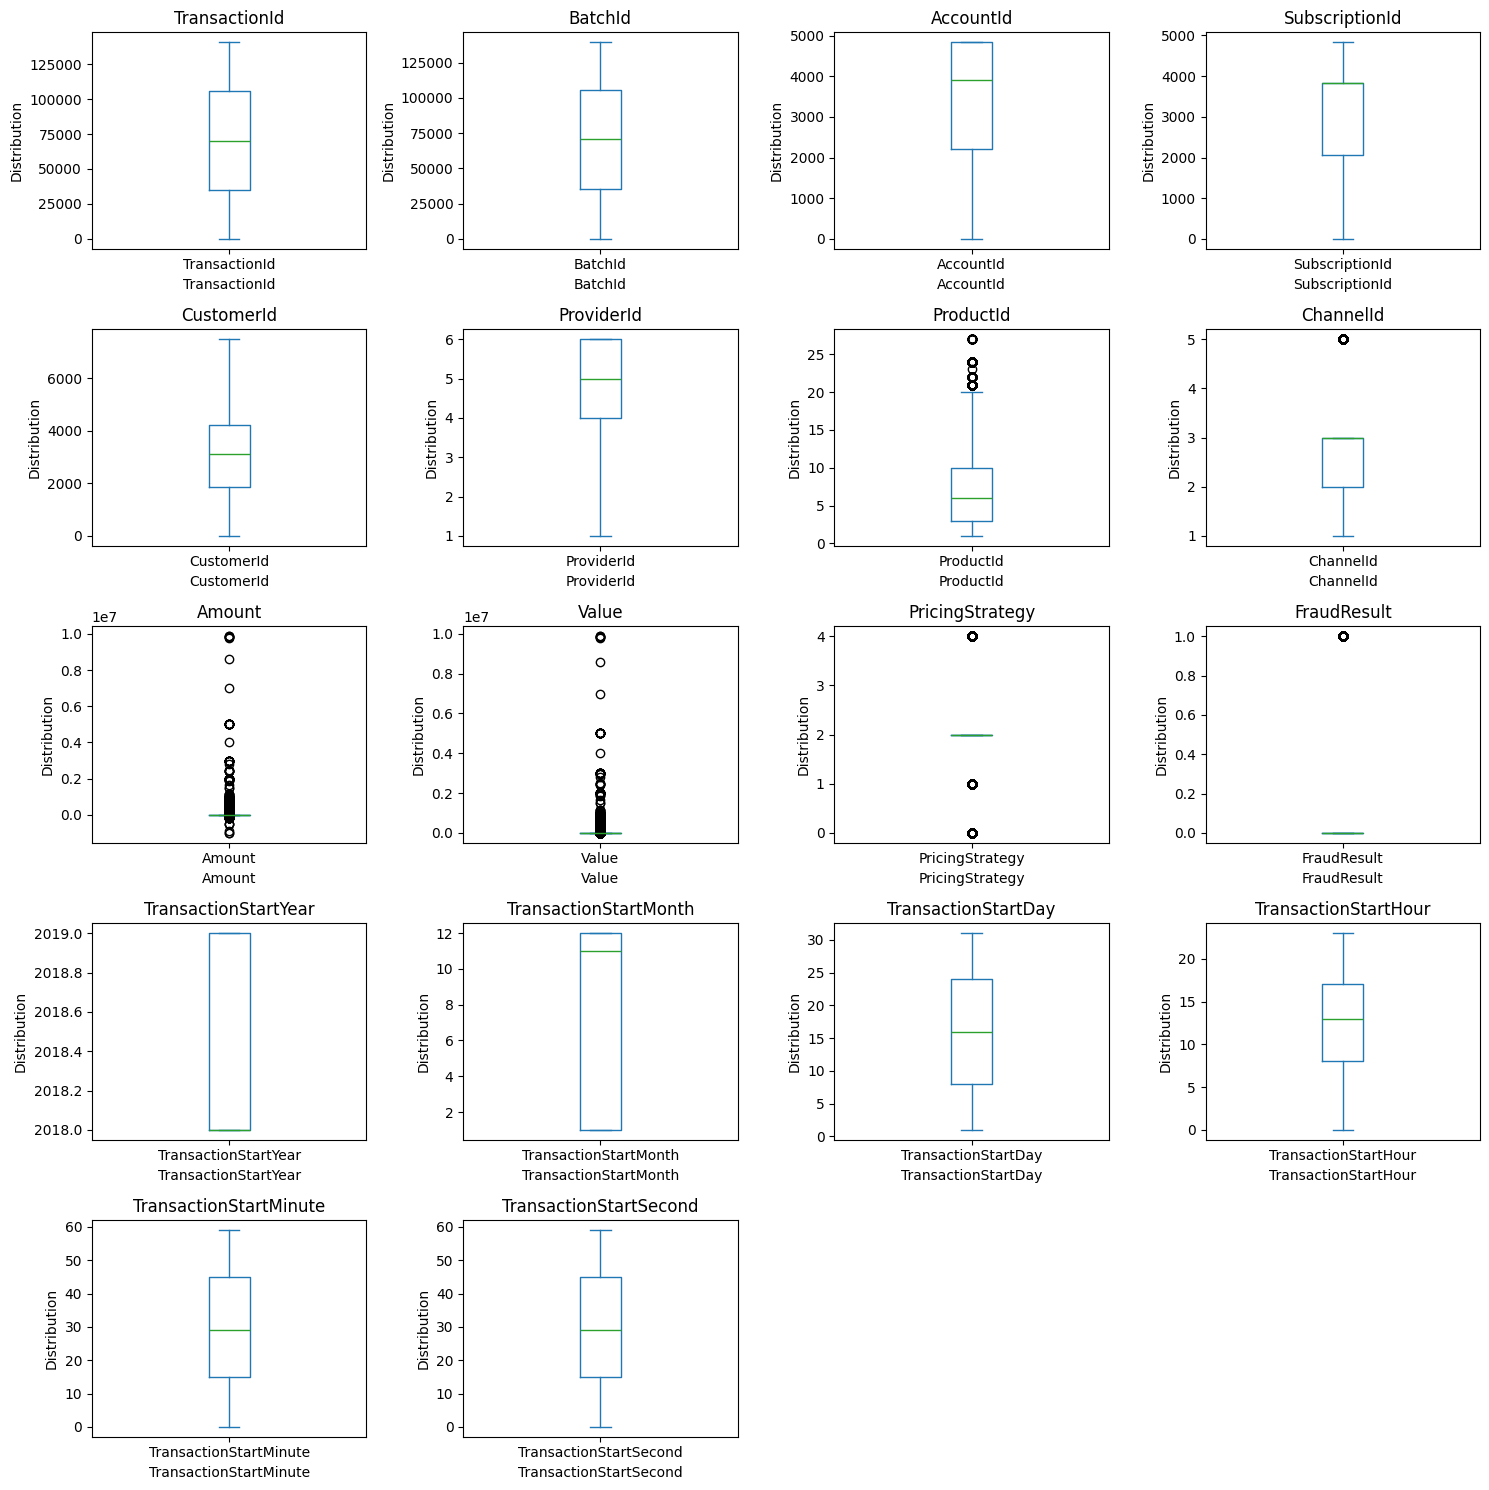

In [46]:
# Define the number of rows and columns for the subplots
n_cols = 4
n_rows = 5  # 5 rows and 4 columns to accommodate 19 plots

# Create subplots for each column
plt.figure(figsize=(15, n_rows * 3))  # Set the figure size to accommodate all plots

for i, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Subplots start at 1, not 0
    df[column].plot(kind='box', title=column)
    plt.xlabel(f'{column}')
    plt.ylabel('Distribution')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

<Axes: >

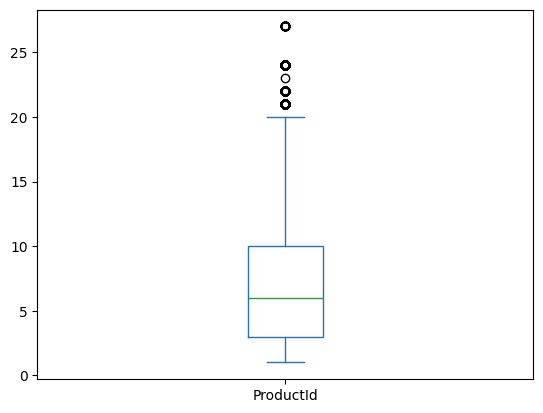

In [47]:
df['ProductId'].plot(kind='box')

In [48]:
'''
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Scale the ProductId and handle NaN values by filling them with 0 or mean
df['ProductId'] = df[['ProductId']].fillna(0)  # You can use fillna(0) or any imputation method

# Scale the data
scaler = StandardScaler()
df['ProductId'] = scaler.fit_transform(df[['ProductId']])

# Sampling the data for memory efficiency
df_sample = df['ProductId'].sample(frac=0.1, random_state=42).to_frame()

silhouette_scores = []
eps_range = np.arange(0.1, 0.9, 0.1)

for eps in eps_range:
    for min_sample in range(2, 6):
        dbscan_model = DBSCAN(eps=eps, min_samples=min_sample)
        labels = dbscan_model.fit_predict(df_sample[['ProductId']])
        
        if len(set(labels)) > 1:  # Ensure more than one cluster
            score = silhouette_score(df_sample[['ProductId']], labels, metric='euclidean')
            silhouette_scores.append((eps, min_sample, score))

# Output the results
silhouette_score= pd.Series(silhouette_scores).sort_index(ascending=False)

silhouette_score.head(10)
#initializing the isolation forest model
silhouette_score.plot(kind='line')
plt.show()
isolation = IsolationForest()
'''

"\nimport numpy as np\nfrom sklearn.cluster import DBSCAN\nfrom sklearn.ensemble import IsolationForest\nfrom sklearn.metrics import silhouette_score\nfrom sklearn.preprocessing import StandardScaler\n\n# Scale the ProductId and handle NaN values by filling them with 0 or mean\ndf['ProductId'] = df[['ProductId']].fillna(0)  # You can use fillna(0) or any imputation method\n\n# Scale the data\nscaler = StandardScaler()\ndf['ProductId'] = scaler.fit_transform(df[['ProductId']])\n\n# Sampling the data for memory efficiency\ndf_sample = df['ProductId'].sample(frac=0.1, random_state=42).to_frame()\n\nsilhouette_scores = []\neps_range = np.arange(0.1, 0.9, 0.1)\n\nfor eps in eps_range:\n    for min_sample in range(2, 6):\n        dbscan_model = DBSCAN(eps=eps, min_samples=min_sample)\n        labels = dbscan_model.fit_predict(df_sample[['ProductId']])\n        \n        if len(set(labels)) > 1:  # Ensure more than one cluster\n            score = silhouette_score(df_sample[['ProductId']], la

In [49]:
#best_debscan=DBSCAN(eps=0.1,)

## Feature Selection

In [50]:
df.corr()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,FraudResult,TransactionStartYear,TransactionStartMonth,TransactionStartDay,TransactionStartHour,TransactionStartMinute,TransactionStartSecond
TransactionId,1.000000,-0.006569,-0.004491,-0.001359,-0.003697,0.000931,0.001211,0.005245,-0.001785,-0.002426,-0.002825,-0.001216,-0.003146,0.002745,0.003519,0.003676,0.001026,0.003572
BatchId,-0.006569,1.000000,0.031850,0.060558,0.144860,-0.034058,-0.017532,-0.063891,-0.013423,0.007764,0.143133,-0.000683,-0.003807,0.002446,-0.049659,0.009070,0.000006,-0.002205
AccountId,-0.004491,0.031850,1.000000,0.352973,0.503405,-0.213127,-0.158946,-0.694218,-0.048580,-0.035141,-0.060051,-0.026157,-0.036843,0.037891,-0.014304,0.013675,-0.002079,0.007495
SubscriptionId,-0.001359,0.060558,0.352973,1.000000,0.133708,-0.221204,-0.112645,-0.423540,-0.036190,-0.011349,0.075654,-0.010864,-0.041059,0.040114,-0.029373,-0.006691,-0.002368,0.004034
CustomerId,-0.003697,0.144860,0.503405,0.133708,1.000000,-0.004948,-0.023494,-0.127159,-0.037375,0.011864,0.332958,-0.004549,0.003659,-0.003370,-0.149401,0.027141,-0.008953,0.001281
ProviderId,0.000931,-0.034058,-0.213127,-0.221204,-0.004948,1.000000,-0.180489,0.323558,-0.049208,-0.062083,-0.143834,-0.051937,0.011386,-0.010075,0.016366,0.004724,-0.000870,-0.002797
ProductId,0.001211,-0.017532,-0.158946,-0.112645,-0.023494,-0.180489,1.000000,0.203787,0.089368,0.082494,-0.185383,0.063452,0.023769,-0.023762,-0.003911,-0.013339,0.001638,-0.003191
ChannelId,0.005245,-0.063891,-0.694218,-0.423540,-0.127159,0.323558,0.203787,1.000000,0.051903,0.028611,0.102395,0.024972,0.052451,-0.051653,0.018608,-0.008965,0.003434,-0.007065
Amount,-0.001785,-0.013423,-0.048580,-0.036190,-0.037375,-0.049208,0.089368,0.051903,1.000000,0.989692,-0.061931,0.557370,0.010738,-0.009060,-0.003905,-0.001611,0.001416,-0.001652
Value,-0.002426,0.007764,-0.035141,-0.011349,0.011864,-0.062083,0.082494,0.028611,0.989692,1.000000,-0.017020,0.566739,0.012001,-0.010452,-0.024104,0.000474,-0.000596,-0.001522


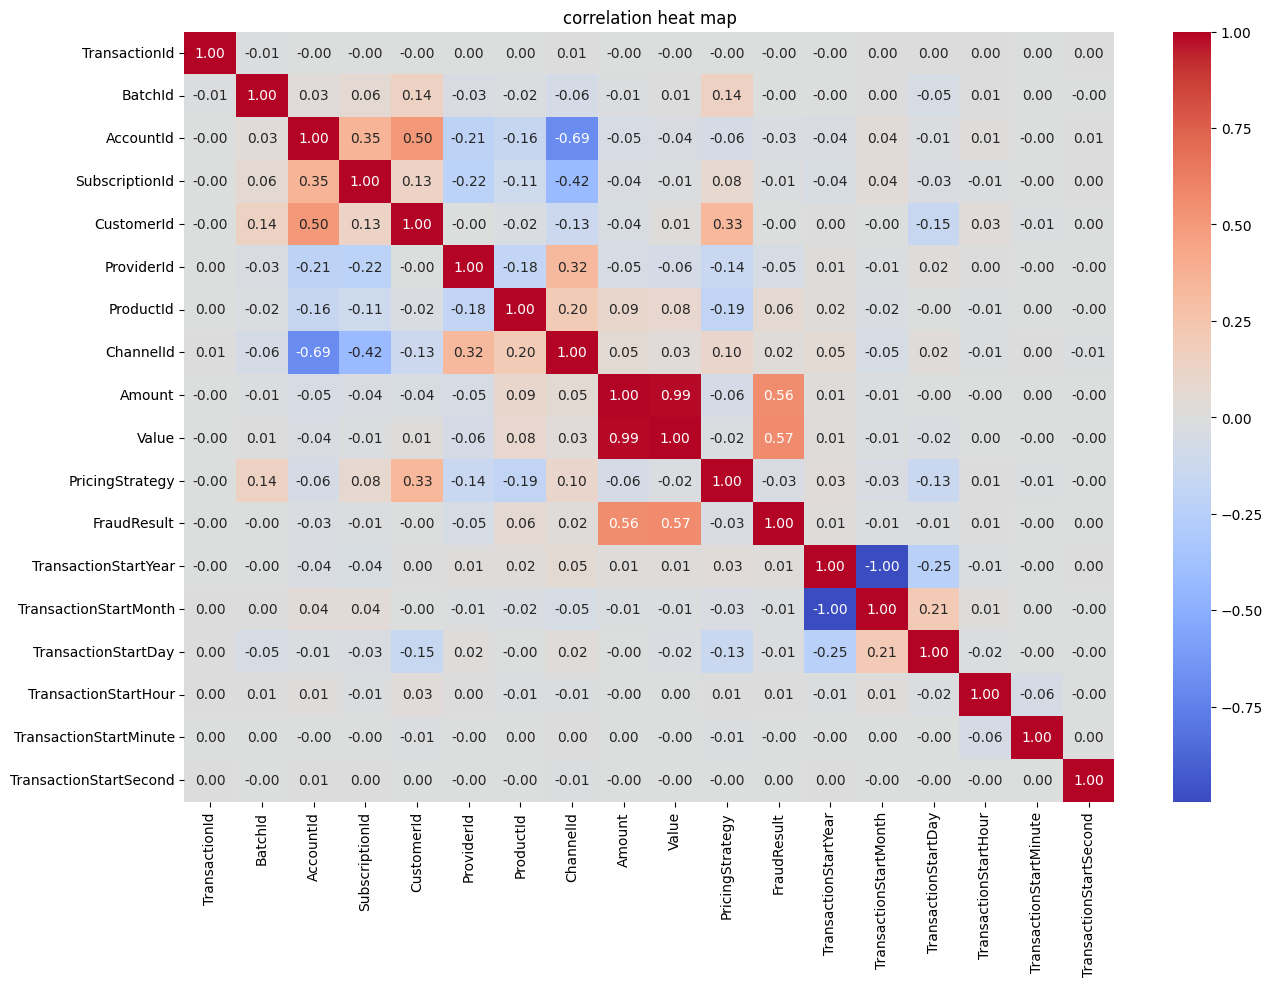

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heat map')
plt.show()

### Key Insights from the Heatmap:

#### High Correlation:
- **Amount** and **Value** have a very high correlation (~0.99), suggesting they are almost linearly related.
- **FraudResult** and **Value** also show a moderate positive correlation (~0.56).
- **PricingStrategy** and **CustomerId** show some correlation (~0.33).

#### Negative Correlation:
- **ChannelId** shows a negative correlation with **AccountId** and **SubscriptionId** (~-0.69, -0.42 respectively).


- *Since the Amount and the Value have a high correlation, we select one of them only.*


Since the Pearson correlation did not capture the relationship between the features and the target variable `FraudResult`, we will explore other correlation methods that can better reveal non-linear relationships, such as Spearman or Kendall correlation.


In [52]:
df.corr(method='kendall')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,FraudResult,TransactionStartYear,TransactionStartMonth,TransactionStartDay,TransactionStartHour,TransactionStartMinute,TransactionStartSecond
TransactionId,1.000000,-0.004392,-0.003084,0.000305,-0.002231,0.001182,0.000863,0.003377,0.002483,0.001688,-0.002159,-0.000993,-0.002567,0.000761,0.002326,0.002519,0.000678,0.002394
BatchId,-0.004392,1.000000,0.008344,0.058772,0.061948,-0.038082,-0.015092,-0.057054,-0.066193,0.055759,0.112883,-0.000587,-0.003121,-0.002164,-0.033919,0.005322,-0.000030,-0.001493
AccountId,-0.003084,0.008344,1.000000,0.259545,0.388318,-0.393199,-0.031736,-0.697801,-0.431176,-0.348319,-0.089264,-0.024505,-0.038819,0.036931,0.008573,0.005967,-0.000885,0.005120
SubscriptionId,0.000305,0.058772,0.259545,1.000000,0.083974,-0.267219,-0.024305,-0.409693,-0.372921,-0.122440,0.117572,-0.011501,-0.035233,0.025321,-0.034910,-0.006120,-0.003310,0.002706
CustomerId,-0.002231,0.061948,0.388318,0.083974,1.000000,-0.021727,-0.003589,-0.071001,-0.088081,0.082259,0.184071,-0.002969,0.006984,-0.001673,-0.075363,0.016101,-0.004610,0.001128
ProviderId,0.001182,-0.038082,-0.393199,-0.267219,-0.021727,1.000000,-0.164650,0.533000,0.323891,0.113421,-0.082893,-0.039652,0.020642,-0.011854,0.015541,0.000904,-0.000146,-0.003281
ProductId,0.000863,-0.015092,-0.031736,-0.024305,-0.003589,-0.164650,1.000000,0.059730,0.168175,0.164850,-0.182367,0.049465,0.019793,-0.015632,0.004665,-0.015091,0.000538,-0.000969
ChannelId,0.003377,-0.057054,-0.697801,-0.409693,-0.071001,0.533000,0.059730,1.000000,0.644366,0.385183,0.033645,0.029729,0.054400,-0.044299,0.017705,-0.004882,0.002561,-0.005644
Amount,0.002483,-0.066193,-0.431176,-0.372921,-0.088081,0.323891,0.168175,0.644366,1.000000,0.460851,-0.118557,0.061729,0.042438,-0.031532,0.029559,-0.011609,0.003250,-0.003766
Value,0.001688,0.055759,-0.348319,-0.122440,0.082259,0.113421,0.164850,0.385183,0.460851,1.000000,0.181821,0.065110,0.055145,-0.041064,-0.099491,-0.014235,0.001433,-0.002669


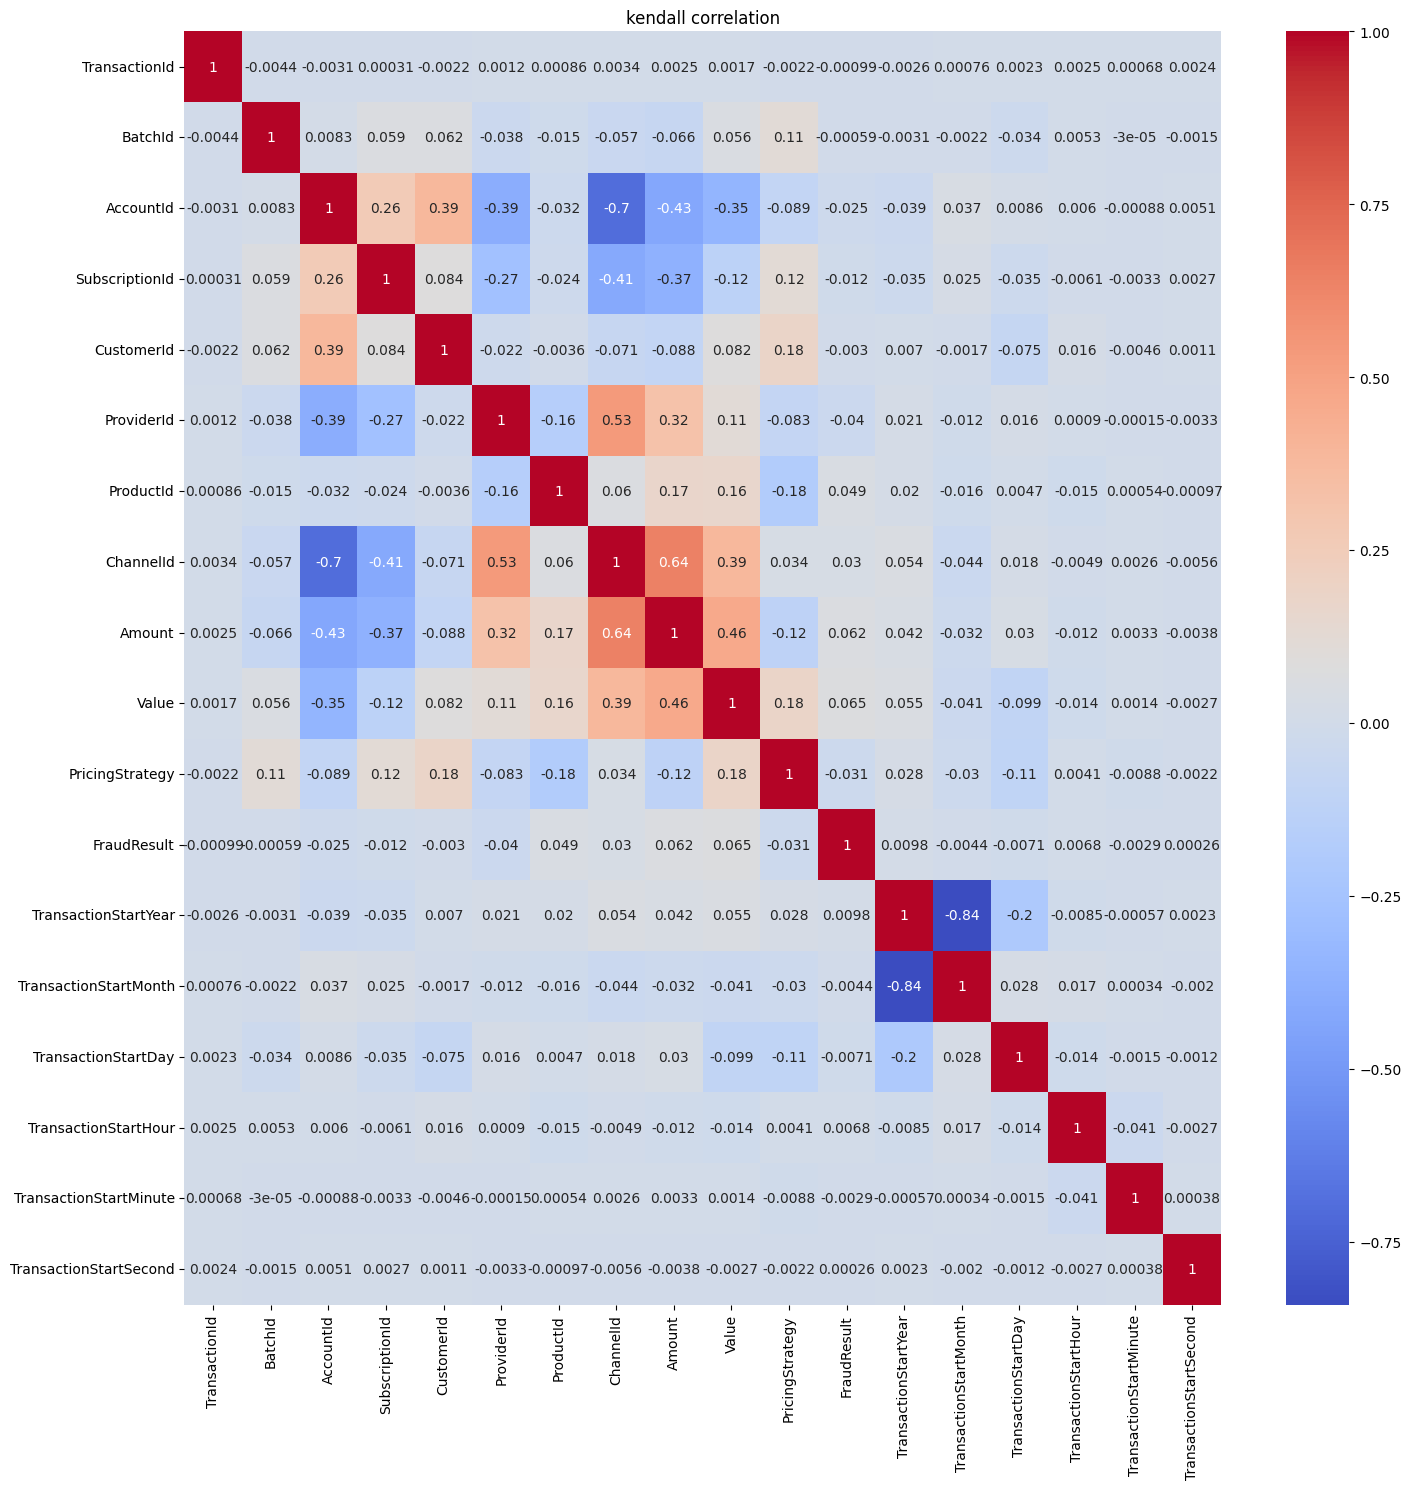

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr('kendall'),annot=True,cmap='coolwarm')
plt.title("kendall correlation")
plt.tight_layout()

In [54]:
df.corr('spearman')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,FraudResult,TransactionStartYear,TransactionStartMonth,TransactionStartDay,TransactionStartHour,TransactionStartMinute,TransactionStartSecond
TransactionId,1.000000,-0.006589,-0.004452,0.000429,-0.003341,0.001560,0.001173,0.004169,0.003626,0.002441,-0.002671,-0.001216,-0.003144,0.001006,0.003428,0.003678,0.001015,0.003554
BatchId,-0.006589,1.000000,0.012147,0.084307,0.092813,-0.050242,-0.020580,-0.070421,-0.096374,0.080862,0.139667,-0.000718,-0.003822,-0.002868,-0.050024,0.007779,-0.000031,-0.002222
AccountId,-0.004452,0.012147,1.000000,0.372952,0.378872,-0.472457,-0.035852,-0.818773,-0.627803,-0.493797,-0.105013,-0.028842,-0.045689,0.047364,0.012232,0.008280,-0.001259,0.007332
SubscriptionId,0.000429,0.084307,0.372952,1.000000,0.121252,-0.336712,-0.032308,-0.479495,-0.492202,-0.155651,0.137751,-0.013490,-0.041324,0.031918,-0.049309,-0.008622,-0.004717,0.003850
CustomerId,-0.003341,0.092813,0.378872,0.121252,1.000000,-0.025551,-0.005029,-0.087485,-0.128618,0.119083,0.227352,-0.003629,0.008537,-0.002239,-0.109506,0.023773,-0.006862,0.001663
ProviderId,0.001560,-0.050242,-0.472457,-0.336712,-0.025551,1.000000,-0.193982,0.577736,0.414078,0.144401,-0.088788,-0.042687,0.022222,-0.013826,0.020193,0.001020,-0.000204,-0.004298
ProductId,0.001173,-0.020580,-0.035852,-0.032308,-0.005029,-0.193982,1.000000,0.067125,0.255123,0.238536,-0.204478,0.055083,0.022041,-0.018682,0.006146,-0.020088,0.000717,-0.001298
ChannelId,0.004169,-0.070421,-0.818773,-0.479495,-0.087485,0.577736,0.067125,1.000000,0.767238,0.458680,0.034606,0.029965,0.054832,-0.048298,0.021481,-0.005921,0.003136,-0.006907
Amount,0.003626,-0.096374,-0.627803,-0.492202,-0.128618,0.414078,0.255123,0.767238,1.000000,0.497395,-0.140729,0.073457,0.050501,-0.040549,0.042637,-0.016714,0.004683,-0.005442
Value,0.002441,0.080862,-0.493797,-0.155651,0.119083,0.144401,0.238536,0.458680,0.497395,1.000000,0.217440,0.077040,0.065249,-0.052175,-0.142090,-0.020613,0.002036,-0.003837


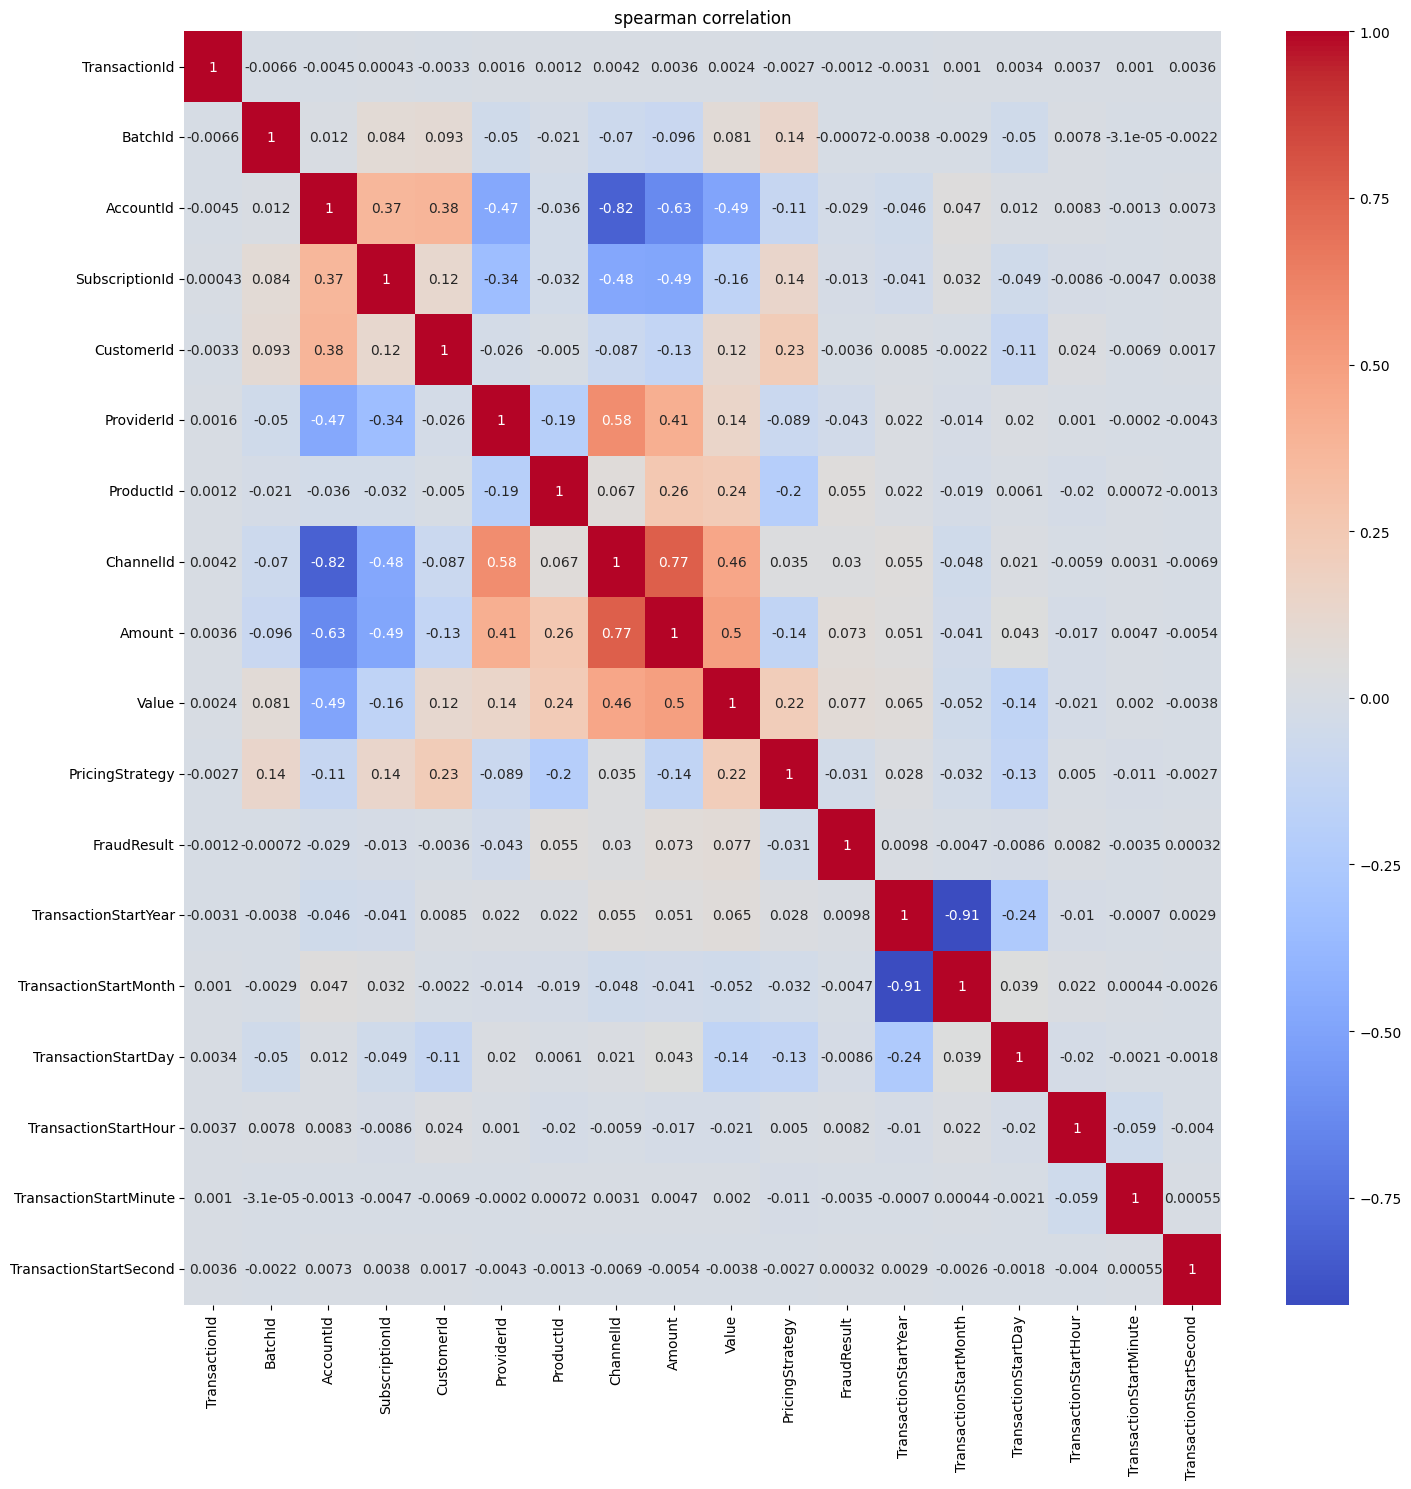

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr('spearman'),annot=True,cmap='coolwarm')
plt.title("spearman correlation")
plt.tight_layout()
plt.show()

In [56]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy', 'FraudResult', 'TransactionStartYear',
       'TransactionStartMonth', 'TransactionStartDay', 'TransactionStartHour',
       'TransactionStartMinute', 'TransactionStartSecond'],
      dtype='object')

In [57]:

from sklearn.feature_selection import mutual_info_classif

x=df.drop(columns=['FraudResult'])
y=df['FraudResult']







In [58]:


mi_scores = mutual_info_classif(x, y, random_state=42)

mi_scores_series=pd.Series(mi_scores,index=x.columns).sort_values(ascending=False)

<Axes: ylabel='Frequency'>

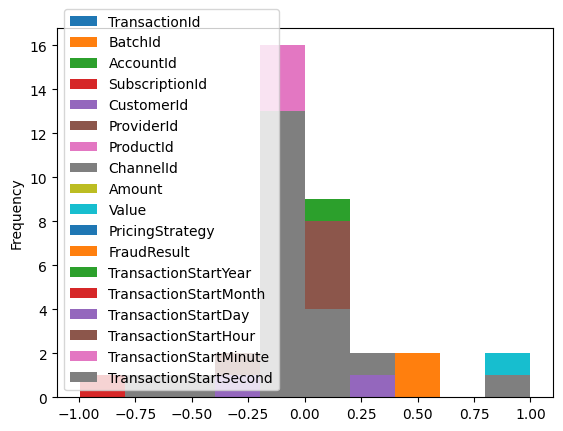

In [59]:
pd.DataFrame(df.corr()).plot(kind='hist')

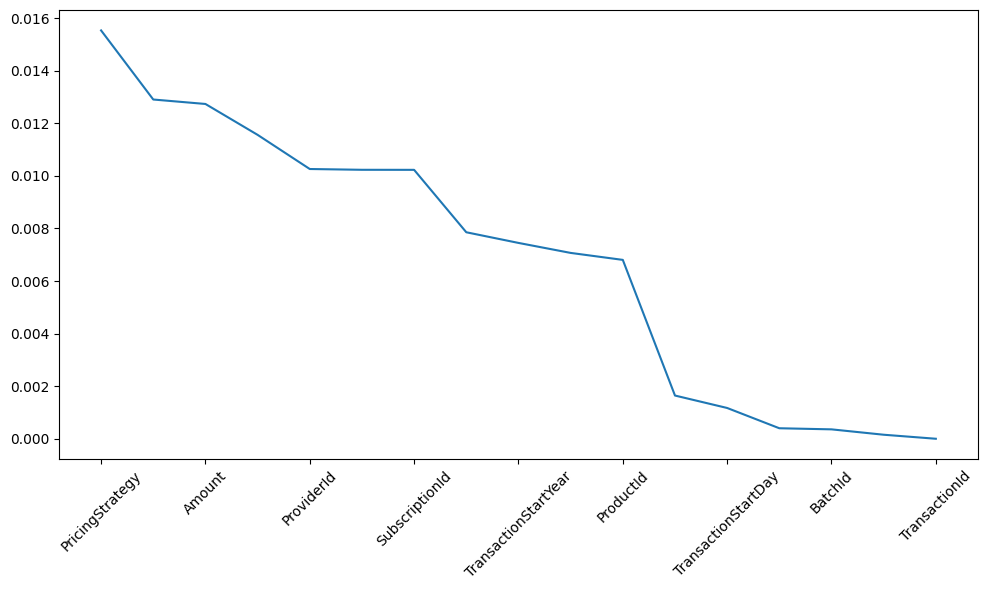

In [60]:
plt.figure(figsize=(10,6))
mi_scores_series.plot(kind='line',rot=45)

plt.tight_layout()

### Choosing a Threshold for Mutual Information Scores

To determine which features to include based on Mutual Information (MI) scores, a common approach is to set a threshold for feature selection. Typically, features with very low MI scores contribute little to model performance and can be removed.

#### Suggested Threshold:
- **Top Features**: You may want to keep features with **Mutual Information scores above 0.01**. These features contribute significant predictive power based on the graph.
- **Low Importance Features**: Features with MI scores close to **0.005 or lower** could be considered for removal, as they provide little information about the target variable.

### Threshold Criteria:
- **MI Score ≥ 0.01**: Consider these as important features to retain.
- **MI Score < 0.005**: Consider dropping these features as they provide minimal information.

Ultimately, the exact threshold depends on the trade-off between model complexity and performance. You may experiment by setting a threshold between **0.005** and **0.01** and observe its effect on the model’s performance.


In [61]:
# Define the threshold for selecting features
threshold = 0.01  # You can adjust this threshold based on your analysis

# Filter features that have MI scores above the threshold
selected_features = mi_scores_series[mi_scores_series >= threshold].index

# Create a new DataFrame with the selected features
X_selected = df[selected_features]  # Select the features from the original DataFrame

# Concatenate the selected features with the target variable 'y'
df_selected = pd.concat([X_selected, y], axis=1)

# Display the new DataFrame
print("New DataFrame with selected features and target variable:")
df_selected.head()


New DataFrame with selected features and target variable:


,PricingStrategy,Value,Amount,ChannelId,ProviderId,AccountId,SubscriptionId,FraudResult
0,2,1000,1000.0,3,6,3957,887,0
1,2,20,-20.0,2,4,4841,3829,0
2,2,500,500.0,3,6,4229,222,0
3,2,21800,20000.0,3,1,648,2185,0
4,2,644,-644.0,2,4,4841,3829,0


In [62]:
df['FraudResult'].value_counts() #checking for class imbalance

FraudResult
0    95469
1      193
Name: count, dtype: int64

In [63]:
count_of_0 = df['FraudResult'].value_counts().get(0,0)
count_of_1 = df['FraudResult'].value_counts().get(1,1)

percentage_count_of_0 = (count_of_0 / df['FraudResult'].count()) * 100

percentage_count_of_1 = (count_of_1 / df['FraudResult'].count()) * 100
print(percentage_count_of_0)
print(percentage_count_of_1)


99.79824799816019
0.20175200183981098


Text(0.5, 1.0, 'target distribution graph')

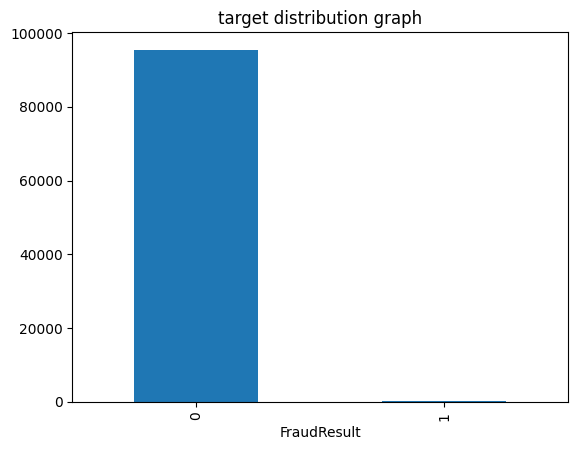

In [64]:
df['FraudResult'].value_counts().plot(kind='bar')
plt.title('target distribution graph')


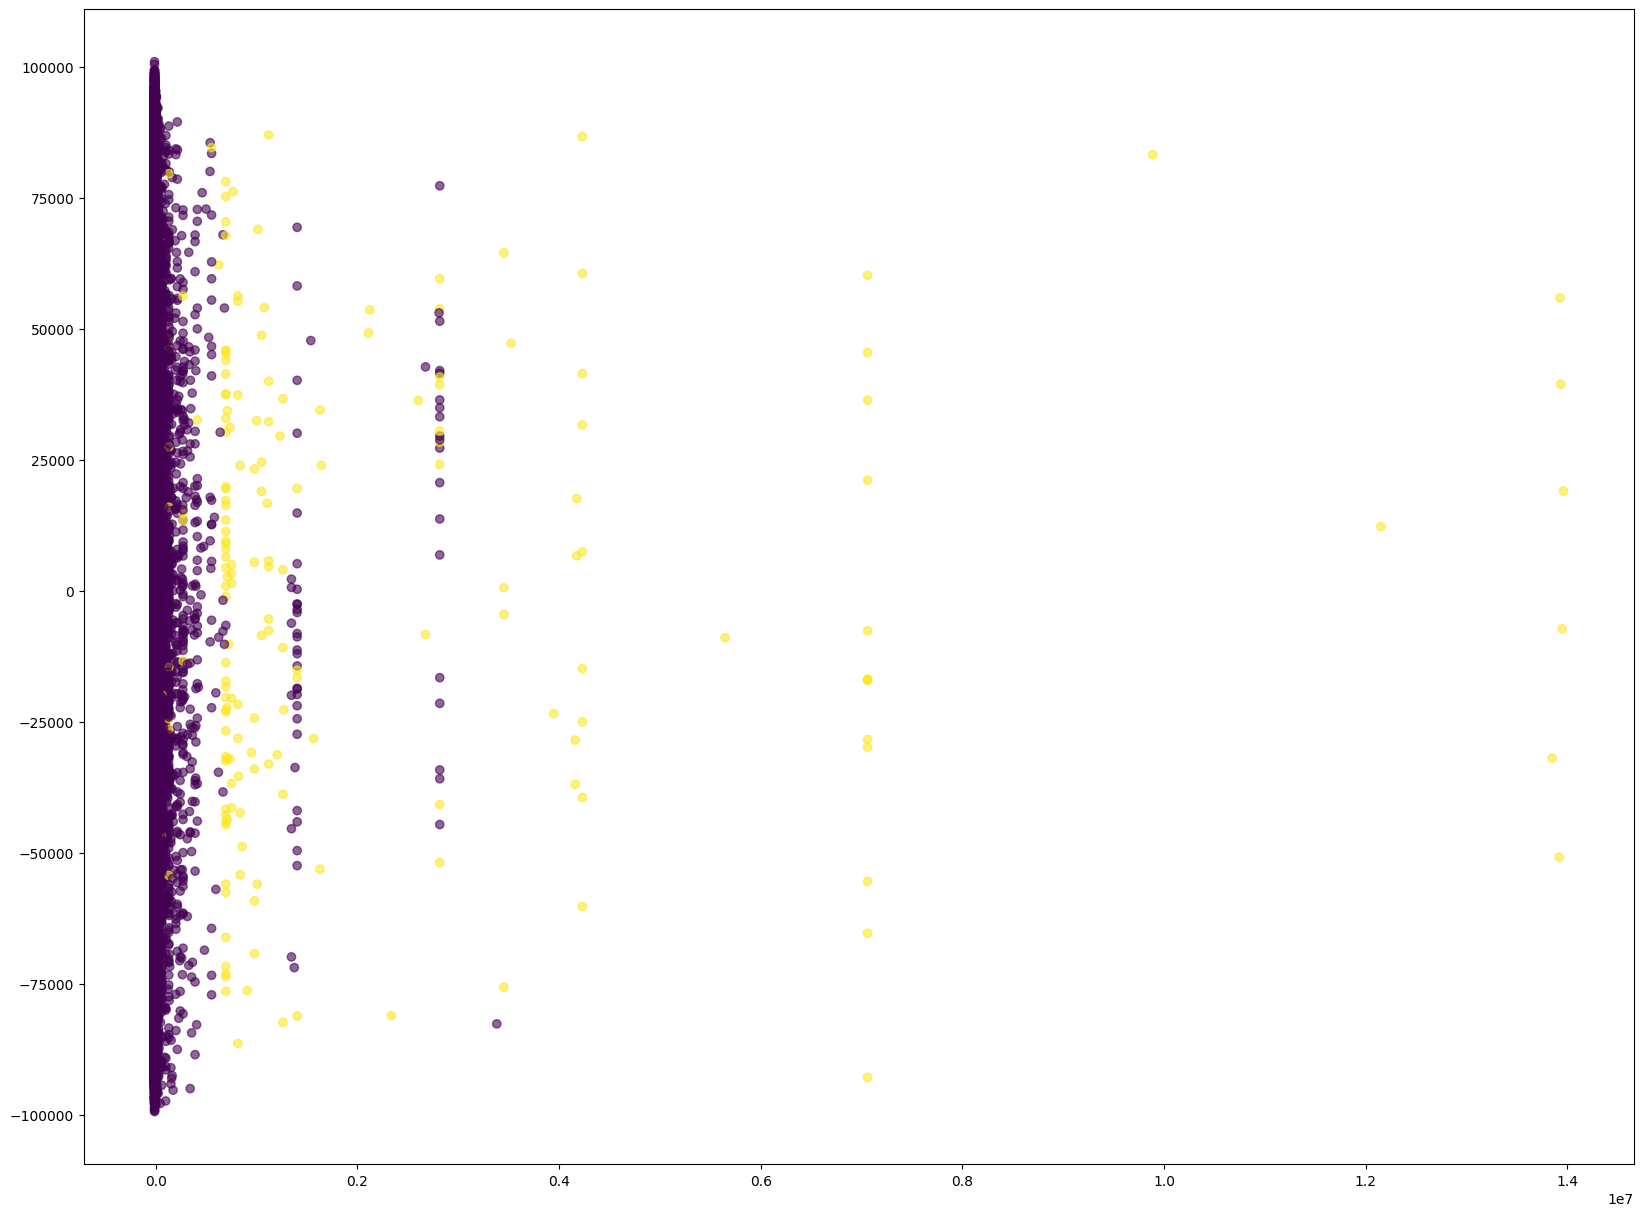

In [65]:
from sklearn.decomposition import PCA

x = df.drop('FraudResult', axis=1)
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
plt.figure(figsize=(20,15))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['FraudResult'],alpha=0.6)


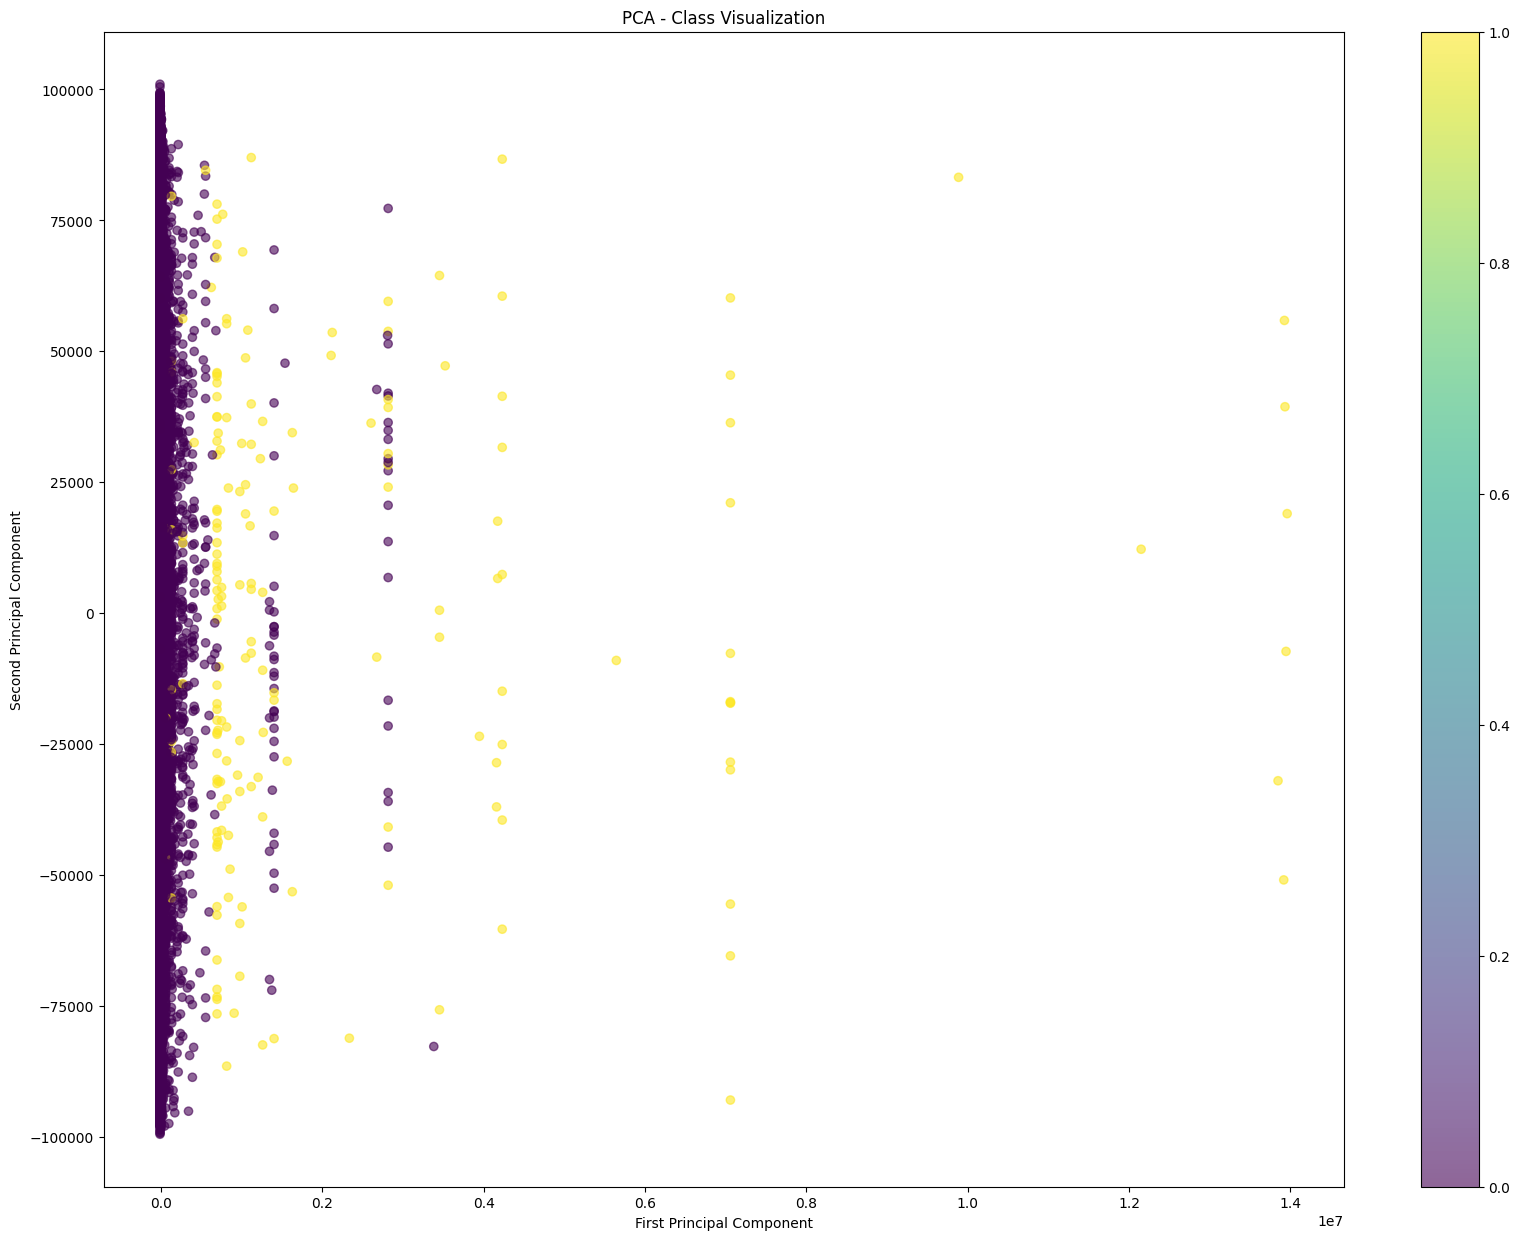

In [66]:
from sklearn.decomposition import PCA

x = df.drop('FraudResult', axis=1)
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
plt.figure(figsize=(20,15))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['FraudResult'],alpha=0.6)
plt.title('PCA - Class Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()


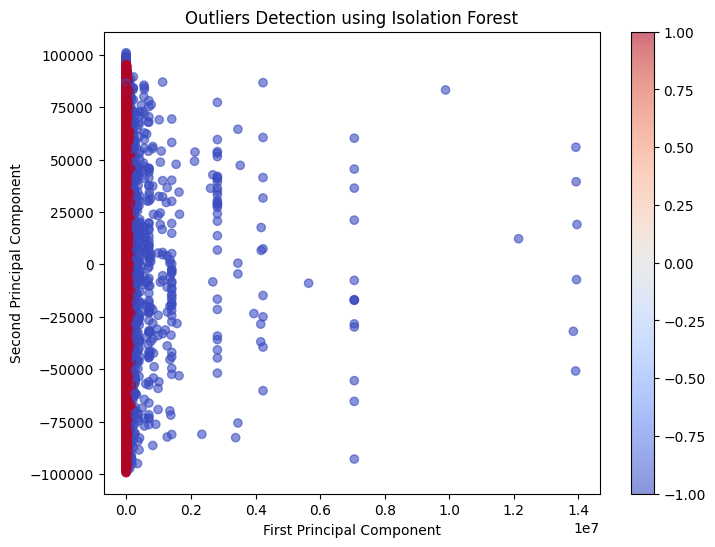

In [67]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # adjust contamination level as needed
outliers = iso_forest.fit_predict(x)

# Visualize Outliers
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=outliers, cmap='coolwarm', alpha=0.6)
plt.title('Outliers Detection using Isolation Forest')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()



In [68]:
'''
from sklearn.manifold import TSNE

x_tsne= TSNE(n_components=2).fit_transform(x)

plt.scatter(x_tsne[:,0],x_tsne[:,1],c=df['FraudResult'])\

computational power complexity stop us from using tsne

'''

KeyboardInterrupt: 

## Justification for Using SMOTE in Credit Scoring Model

Given our business objective at **Bati Bank** to create a **Credit Scoring Model** in collaboration with an eCommerce platform, we have carefully considered the specific requirements and challenges associated with this project:

### 1. Business Context and Objective
   - Our objective is to enable a **buy-now-pay-later** service that empowers customers to make purchases on credit. This service inherently involves financial risk, particularly if high-risk customers are misclassified as low-risk.
   - Since financial models like credit scoring are often subject to regulatory scrutiny, we prioritize interpretability and reliability in our approach.
   - We aim to minimize **false positives** (approving a high-risk customer as low-risk), which would lead to financial losses for Bati Bank.

### 2. Class Imbalance and Data Complexity
   - The dataset provided has a **significant class imbalance** (99.798% for the majority class and ~0.000% for the minority class).
   - Visualizations from PCA and Isolation Forest suggest a slight but consistent separation in feature space between the low-risk (majority) and high-risk (minority) classes, although some overlap exists. 
   - Given the complexity of the data, it is crucial to avoid amplifying noise or overfitting on ambiguous boundary cases, as this could lead to model instability and poor generalization on new data.

### 3. Why We Chose SMOTE Over ADASYN
   - **Uniformity and Stability**: SMOTE generates synthetic samples in a more uniform manner across the minority class, rather than focusing exclusively on the boundary. This reduces the likelihood of overfitting to noise, which is critical in a high-stakes financial application.
   - **Enhanced Interpretability**: Since SMOTE does not prioritize boundary cases alone, it supports the development of a more **interpretable model** that aligns with regulatory standards, which is especially important for credit scoring models.
   - **Reduced Risk of Amplifying Noise**: Our data exhibits some outliers, as seen in the Isolation Forest analysis. SMOTE’s approach to creating balanced samples mitigates the risk of overfitting on these noisy instances, ensuring that our model remains robust and avoids false positives.
   - **Balancing Conservative and Effective Sampling**: SMOTE provides a **balanced approach** by generating synthetic samples for the minority class without altering the distribution excessively. This conservativeness aligns with our goal to minimize financial risk by maintaining a focus on high-risk cases in a more stable, predictable way.

### Conclusion
In conclusion, **we chose SMOTE** as the class imbalance handling technique for this project because it aligns well with our business objectives:
- **Financial Risk Mitigation**: By avoiding an overemphasis on boundary samples, SMOTE helps reduce the risk of approving high-risk customers.
- **Regulatory Compliance**: SMOTE's sampling method enhances the model’s interpretability, a key factor in regulatory environments.
- **Long-term Stability**: SMOTE offers a conservative yet effective way to balance our dataset, supporting the creation of a reliable and stable credit scoring model.

Overall, SMOTE provides the right balance between improving minority class representation and ensuring that our model remains interpretable, robust, and aligned with Bati Bank's risk management standards.


In [69]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [70]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
smote=SMOTE()

x_scaled = scaler.fit_transform(x)
X_resampled, y_resampled = smote.fit_resample(x_scaled, y)

print(pd.Series(y_resampled).value_counts())


FraudResult
0    95469
1    95469
Name: count, dtype: int64


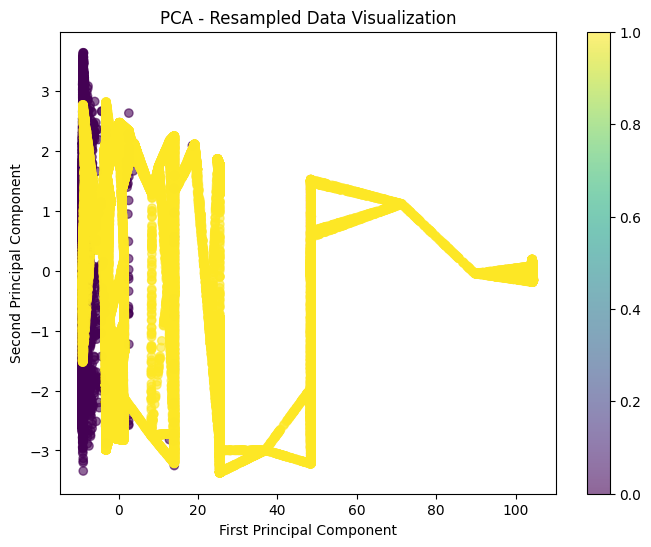

In [71]:
# Visualize using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_resampled_pca = pca.fit_transform(X_resampled)
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=y_resampled, cmap='viridis', alpha=0.6)
plt.title('PCA - Resampled Data Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()


it it the pca that reduces the variance and nuance of the dataset. still the sote is working